In [1]:
# Install required packages (uncomment if not already installed)
# !pip install torch torchvision torchmetrics tqdm pandas matplotlib numpy

# Import required libraries
import os
import json
import argparse
import torch
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torchvision.transforms.v2 as transforms_v2
from tqdm import tqdm
from torch.utils.data import DataLoader
from torch.optim import Adam
from torchvision import transforms
from torchmetrics.image import PeakSignalNoiseRatio, StructuralSimilarityIndexMeasure
import matplotlib.pyplot as plt

# Import your custom modules
from models.vae import VAE
from utils.dataset.nih import NIHChestDataset

# Set logging
import logging
logging.basicConfig(level=logging.INFO)

# Set device
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

print(f"Using device: {DEVICE}")

c:\Program Files\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda


In [2]:
# set the correct paths
DATASET_PATH = "C:\Data\archive"  # data set path
SAVE_PATH = "C:\Data\processed"  # path to save processed data
IMAGE_DIM = 224

In [ ]:
# pre processing
from utils.preprocessing.preprocessing_v2 import preprocess_dataset

# Create an argparse Namespace to pass arguments
args = argparse.Namespace(
    dataset_path=DATASET_PATH,
    save_path=SAVE_PATH,
    image_dim=IMAGE_DIM
)

# Run the preprocessing function
preprocess_dataset(args)

print(f"Preprocessing completed! Processed dataset saved at: {SAVE_PATH}")

INFO:utils.preprocessing.preprocessing_v2:Processing 112120 images using 20 processes...
Processing Images: 100%|██████████| 112120/112120 [02:00<00:00, 926.80it/s]
INFO:utils.preprocessing.preprocessing_v2:Dataset saved with 47990 (Train), 5999 (Dev), 5999 (Test)


Preprocessing completed! Processed dataset saved at: C:\Data\processed


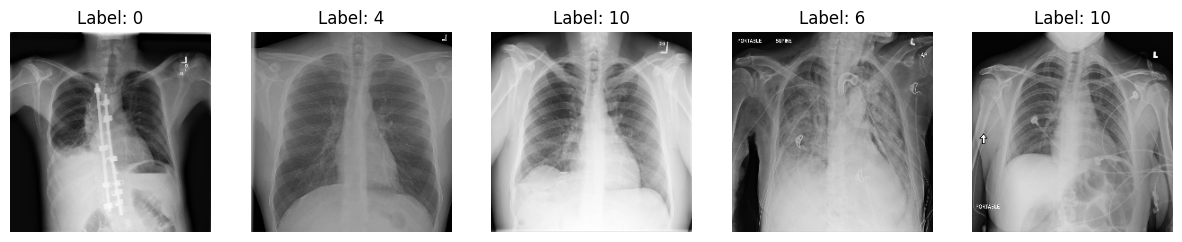

In [5]:
# Load the processed images and labels
train_images = np.load(SAVE_PATH + "/train_images.npy")
train_labels = np.load(SAVE_PATH + "/train_labels.npy")

# Visualize some images
num_samples = 5  # Number of images to display
fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))

for i in range(num_samples):
    axes[i].imshow(train_images[i+30].squeeze(), cmap='gray')  # Remove extra dimension if necessary
    axes[i].set_title(f"Label: {train_labels[i]}")
    axes[i].axis("off")

plt.show()

In [6]:
from train_vae import train_vae

args = argparse.Namespace(
    train_images_path= SAVE_PATH + '/train_images.npy',
    dev_images_path=SAVE_PATH + '/dev_images.npy',
    train_labels_path=SAVE_PATH + '/train_labels.npy',
    dev_labels_path=SAVE_PATH + '/dev_labels.npy',
    save_path='model_outputs/vae_v4',
    epochs=20,
    beta_weightage=1e-4,
    learning_rate=3e-4,
    batch_size=256,
    image_dim=224,
    num_workers=0,
    device='cuda'
)

train_vae(args)

Epoch: 1 / 20. Loss: 0.0807, PSNR: 25.2654 SSIM: 0.5284: 100%|██████████| 188/188 [09:18<00:00,  2.97s/it]
Epoch: 1 / 20. Loss: 0.0284, PSNR: 27.6527 SSIM: 0.7652: 100%|██████████| 24/24 [00:42<00:00,  1.77s/it]
INFO:root:Model Saved
Epoch: 2 / 20. Loss: 0.0369, PSNR: 27.1866 SSIM: 0.6302: 100%|██████████| 188/188 [10:07<00:00,  3.23s/it]
Epoch: 2 / 20. Loss: 0.0233, PSNR: 29.6053 SSIM: 0.8127: 100%|██████████| 24/24 [00:44<00:00,  1.84s/it]
INFO:root:Model Saved
Epoch: 3 / 20. Loss: 0.0317, PSNR: 27.9118 SSIM: 0.6847: 100%|██████████| 188/188 [12:49<00:00,  4.09s/it]
Epoch: 3 / 20. Loss: 0.0220, PSNR: 29.9388 SSIM: 0.8222: 100%|██████████| 24/24 [00:42<00:00,  1.78s/it]
INFO:root:Model Saved
Epoch: 4 / 20. Loss: 0.0288, PSNR: 28.5803 SSIM: 0.7275: 100%|██████████| 188/188 [09:15<00:00,  2.96s/it]
Epoch: 4 / 20. Loss: 0.0223, PSNR: 30.2778 SSIM: 0.8390: 100%|██████████| 24/24 [00:43<00:00,  1.83s/it]
INFO:root:Model Saved
Epoch: 5 / 20. Loss: 0.0268, PSNR: 28.9889 SSIM: 0.7537: 100%|██

In [3]:
from test_vae import test_vae

PROCESSED_DATA_PATH = "C:\Data\processed"  # path to save processed data

class Args:
    test_dataset_path = PROCESSED_DATA_PATH + "/test_images.npy"
    test_images_path = PROCESSED_DATA_PATH + "/test_images.npy"
    test_labels_path = PROCESSED_DATA_PATH + "/test_labels.npy"
    save_path = 'mc_results_20250406'
    model_weights = 'model_outputs/vae_v4/model_weights/vae_weights_20.pth'
    beta_weightage = 1e-4
    batch_size = 256
    image_dim = 224
    num_workers = 4
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    mc_passes = 50

args = Args()
test_vae(args)

Loss: 0.0177, PSNR: 31.9117 SSIM: 0.8707 Max Uncertainty: 0.0744: 100%|██████████| 24/24 [09:48<00:00, 24.53s/it]

[{'batch_index': 0, 'loss': 0.01761295273900032, 'psnr': 31.712600708007812, 'ssim': 0.8716543912887573, 'avg_uncertainty': 0.00020018356735818088, 'max_uncertainty': 0.09003304690122604}, {'batch_index': 1, 'loss': 0.017593851312994957, 'psnr': 31.814144134521484, 'ssim': 0.8704376816749573, 'avg_uncertainty': 0.00019602793327067047, 'max_uncertainty': 0.08403736352920532}, {'batch_index': 2, 'loss': 0.018032846972346306, 'psnr': 31.654382705688477, 'ssim': 0.8677685260772705, 'avg_uncertainty': 0.0002087423054035753, 'max_uncertainty': 0.0970769003033638}, {'batch_index': 3, 'loss': 0.017578449100255966, 'psnr': 31.691225051879883, 'ssim': 0.8735494017601013, 'avg_uncertainty': 0.00020364686497487128, 'max_uncertainty': 0.07435395568609238}, {'batch_index': 4, 'loss': 0.017556307837367058, 'psnr': 31.853466033935547, 'ssim': 0.8719618320465088, 'avg_uncertainty': 0.00020007792045362294, 'max_uncertainty': 0.09698572754859924}, {'batch_index': 5, 'loss': 0.017971228808164597, 'psnr': 